## *Import Libraries*

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

## *Load Dataset*

In [44]:
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [45]:
drops = ['RowNumber', 'CustomerId', 'Surname']
df.drop(columns=drops,inplace = True)

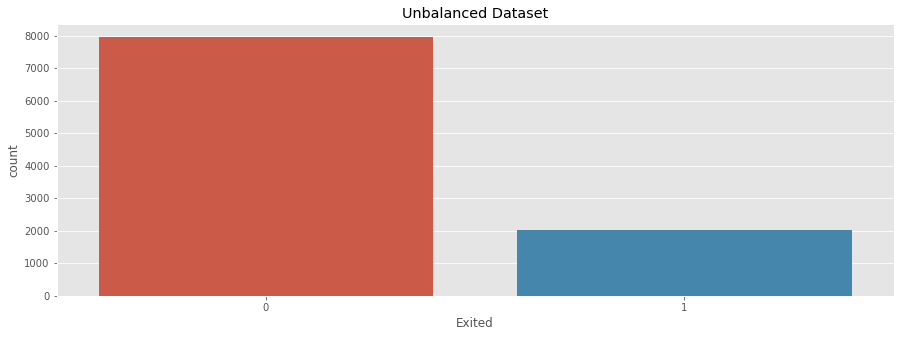

In [51]:
plt.style.use('ggplot')
fig,ax = plt.subplots(1,1,figsize = (15,5))
ax.set_title('Unbalanced Dataset')
sns.countplot(data = df,x = "Exited",ax = ax)
plt.savefig('unbalanced_dataset.png')
plt.show()

## *Preprocessing*

In [7]:
df.Gender = np.where(df.Gender=="Male",1,0)

In [8]:
df = pd.get_dummies(df,prefix="",prefix_sep="")

## *Split Data*

In [9]:
X = df.drop(columns=['Exited']).values
y = df.Exited.values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

## *First Model*

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
clf = RandomForestClassifier(max_depth=6,
                             n_estimators = 400,
                             random_state = 42)

In [60]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, n_estimators=400, random_state=42)

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
def cm_plot(cm):
    
    fig,ax = plt.subplots(1,1,figsize = (15,5))
    ax.set_title('Confussion Matrix')
    sns.heatmap(cm,annot=True,fmt=".1f",ax = ax,cmap="crest")
    

In [64]:
pred = clf.predict(X_test)
cm = confusion_matrix(y_test,pred)

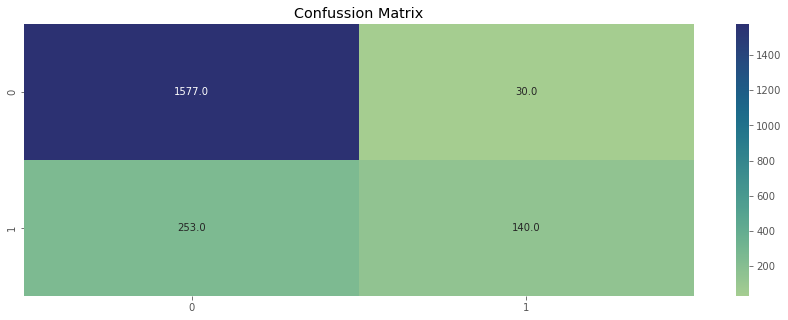

In [67]:
cm_plot(cm)
plt.savefig('confusion_matrix_inbalaced.png')

## *Second Model*

In [85]:
clf = RandomForestClassifier(max_depth=6,
                             n_estimators = 400,
                             random_state = 42,
                             class_weight="balanced")

* class_weight: It refers to equalize the weights for each category, it helps enormously when a class is enormously unbalanced as in this case.

In [69]:
clf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, n_estimators=400,
                       random_state=42)

In [70]:
clf.score(X_train,y_train)

0.818

In [71]:
clf.score(X_test,y_test)

0.814

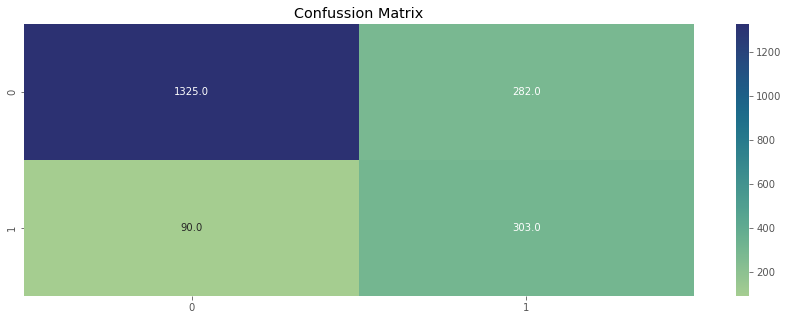

In [72]:
pred = clf.predict(X_test)
cm = confusion_matrix(y_test,pred)
cm_plot(cm)
plt.savefig('confusion_matrix_balanced.png')

## *SMOTE*

The SMOTE function also serves to balance the data, it consists of adding more new data to the categories that are less present in the dataset, it takes similar characteristics of the data to create them.

In [74]:
from imblearn.over_sampling import SMOTE

In [76]:
smote = SMOTE(random_state=42)

In [77]:
X_train_balanced,y_train_balanced = smote.fit_resample(X_train,y_train)
X_test_balanced,y_test_balanced = smote.fit_resample(X_test,y_test)

In [82]:
np.unique(y_train_balanced,return_counts=True)

(array([0, 1], dtype=int64), array([6356, 6356], dtype=int64))

In [81]:
np.unique?

In [78]:
clf = RandomForestClassifier(max_depth=6,
                             n_estimators = 400,
                             random_state = 42)

In [79]:
clf.fit(X_train_balanced,y_train_balanced)

RandomForestClassifier(max_depth=6, n_estimators=400, random_state=42)

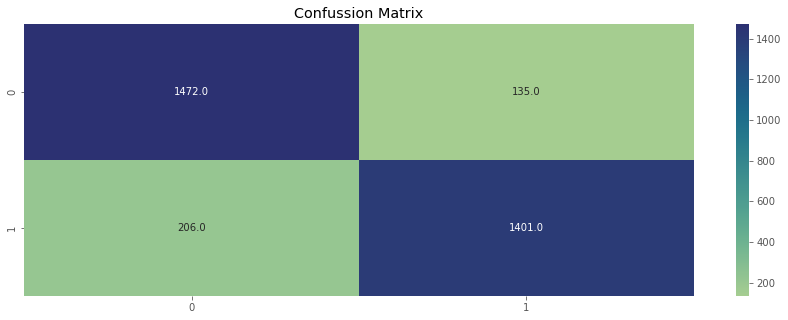

In [84]:
pred = clf.predict(X_test_balanced)
cm = confusion_matrix(y_test_balanced,pred)
cm_plot(cm)
plt.savefig('smote_matrix.png')